In [332]:
import numpy as np
import pandas as pd 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
class textAnalysis:
    def __init__(self, df):
        self.df = df 
         
    def get_required_data(self):
        df0 = self.df.copy()
        df0.dropna(inplace = True)
        df0.drop_duplicates(inplace = True)
        df0.drop(columns='id',inplace=True)
        df0.drop(columns='Parameter Name',inplace=True)
        df0.drop(columns='Lemma_Description',inplace=True)
        return df0

    def unique_statement_freq(self):
        #Method to find unique statements
        return self.df.Description.value_counts().to_frame()

    def get_preprocess_data(self):
        #self.get_required_data()
        df0 = self.get_required_data()
        corpus = []
        lemma = WordNetLemmatizer()
        for i in range(len(df0)):
            unt = re.sub('[^0-9a-zA-Z]',' ',df0.iloc[i,3])
            #unt.append(unit_1.iloc[i,3].lower())
            unt = unt.lower()
            unt = unt.split()
            unt = [lemma.lemmatize(word) for word in unt if word not in set(stopwords.words('english'))]
            unt = ' '.join(unt)
            corpus.append(unt)
        df0["clean_description"] =  corpus
        return df0

    def get_unit(self,unit):
        tc = self.get_preprocess_data()
        units_grp=tc.groupby("Unit",group_keys=True)
        ut = units_grp.get_group(unit)
        return ut
    def get_shiftwise_words(self,unit):
        df1 = self.get_unit(unit)
        shifts = df1.groupby("Shift",group_keys=True)
        ngt_sfts = shifts.get_group("Night Shift")
        mor_sfts = shifts.get_group("Morning Shift")
        eve_sfts = shifts.get_group("Evening Shift")
        nt_sft = []
        night  = []
        for i in ngt_sfts.clean_description:
            nt_sft.append(i.split())
        for i in nt_sft:
            for j in i:
                night.append(j)
        mr_sft = []
        morning  = []
        for i in mor_sfts.clean_description:
            mr_sft.append(i.split())
        for i in mr_sft:
            for j in i:
                morning.append(j)
        ev_sft = []
        evening  = []
        for i in eve_sfts.clean_description:
            ev_sft.append(i.split())
        for i in ev_sft:
            for j in i:
                evening.append(j)
        sfts = pd.DataFrame()
        sfts["eveningwords"] = evening
        sfts["nightwords"] = night
        sfts["morningwords"] = morning
        return sfts
    
    def get_shiftwise_word_freq(self,unit):
        #method to find shift wise word frequency
        w = self.get_shiftwise_words(unit)
        nightsft_wrdcount = w.nightwords.value_counts().to_frame()
        morningsft_wrdcount =w.morningwords.value_counts().to_frame()
        eveningsft_wrdcount =w.eveningwords.value_counts().to_frame()
        return nightsft_wrdcount,morningsft_wrdcount,eveningsft_wrdcount

    def unitwise_equipments(self,unit):
        df2 = self.get_unit(unit)
        unitx = []
        unitxwords  = []
        for i in df2.clean_description:
            unitx.append(i.split())
        for i in unitx:
            for j in i:
                unitxwords.append(j)
        ptern = r'\d+[a-z]+\d+[a-z]+\b|\d+[a-z]+\d+\b'
        instru = []
        equip = []
        for i in unitxwords:
            match = re.findall(ptern, i)
            if len(match) != 0:
                #print(match)
                instru.append(match)
        equip = pd.DataFrame()
        equip["equipments"] = instru
        return equip
    
    def catch_and_append_equipments_in_df(self,unit):
        df3 = self.get_unit(unit)
        ptern = r'\d+[a-z]+\d+[a-z]+\b|\d+[a-z]+\d+\b'
        df3["equipments"] = df3["clean_description"].apply(lambda x: ''.join(re.findall(ptern, x)))
        return df3
    
    def get_equipmentwise_problem(self,unit,equipment):
        df4 =self.catch_and_append_equipments_in_df(unit)
        grouped_by_equipment=df4.groupby("equipments",group_keys=True)
        equipment_wise_problem = grouped_by_equipment.get_group(equipment)
        return equipment_wise_problem
    
    def get_equipment_frequency(self,unit):
        #Method to find most frequently mentioned equipment
        df4 =self.catch_and_append_equipments_in_df(unit)
        return df4.equipments.value_counts().to_frame()
    
    def plot_word_cloud(self,unit):
        #Method to plot word cloud of equipments
        df4 =self.catch_and_append_equipments_in_df(unit)
        Equipment_combined = ' '.join(df4['equipments'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Equipment_combined)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    def sequential_call(self,unit,equipment):
        self.get_required_data()
        self.unique_statement_freq()
        self.get_preprocess_data()
        self.get_unit(unit)
        self.get_shiftwise_words(unit)
        self.get_shiftwise_word_freq(unit)
        self.unitwise_equipments(unit)
        self.catch_and_append_equipments_in_df(unit)
        self.get_equipmentwise_problem(unit,equipment)
        self.get_equipment_frequency(unit)
        self.plot_word_cloud(unit)

In [333]:
df = pd.read_csv('data.csv')
df

,Unit,Date,Shift,Parameter Name,Description,id,Lemma_Description
0,NaN,NaN,NaN,NaN,NaN,1,
1,CDU-I,01-04-22,Night Shift,*,High Atmos column over flash leading to high v...,2,High Atmos column flash lead high vacuum colu...
2,CDU-I,01-04-22,Night Shift,*,"3"" MP steam line leak overhead of 2GM53A.""",3,3 '' MP steam line leak overhead 2GM53A ''
3,CDU-I,01-04-22,Night Shift,*,2F2 pass 1 tube bowing issue to spigot support...,4,2F2 pas 1 tube bow issue spigot support damage
4,CDU-I,01-04-22,Morning Shift,*,High Atmos column over flash leading to high v...,5,High Atmos column flash lead high vacuum colu...
...,...,...,...,...,...,...,...
995,CDU-II,19-04-22,Morning Shift,*,pH meters are not working.,996,pH meter work
996,CDU-II,19-04-22,Morning Shift,*,RCO G/G isolated condition due to body leak.,997,RCO G/G isolated condition due body leak
997,CDU-II,19-04-22,Morning Shift,*,11F01 Skin thermocouples Pass B 2 nos. and Pas...,998,11F01 Skin thermocouple Pass B 2 no Pass D 2 ...
998,CDU-II,19-04-22,Morning Shift,*,"11PM14A,14B, 13B, 13C control cable problem ex...",999,"11PM14A,14B 13B 13C control cable problem exi..."


In [334]:
obj1 = textAnalysis(df)
obj1.get_required_data()

,Unit,Date,Shift,Description
1,CDU-I,01-04-22,Night Shift,High Atmos column over flash leading to high v...
2,CDU-I,01-04-22,Night Shift,"3"" MP steam line leak overhead of 2GM53A."""
3,CDU-I,01-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...
4,CDU-I,01-04-22,Morning Shift,High Atmos column over flash leading to high v...
5,CDU-I,01-04-22,Morning Shift,"3"" MP steam line leak overhead of 2GM53A."""
...,...,...,...,...
995,CDU-II,19-04-22,Morning Shift,pH meters are not working.
996,CDU-II,19-04-22,Morning Shift,RCO G/G isolated condition due to body leak.
997,CDU-II,19-04-22,Morning Shift,11F01 Skin thermocouples Pass B 2 nos. and Pas...
998,CDU-II,19-04-22,Morning Shift,"11PM14A,14B, 13B, 13C control cable problem ex..."


In [335]:
obj1.unique_statement_freq()

,Description
2F2 pass 1 tube bowing issue to spigot support damage.,90
2F4 ITS damaged.,90
2F1 COT low due to high arch pressure issue and low preheat.,90
High Atmos column overflash leading to high vacuum column top temperature.,60
"11E21 SW return line leak ,Near 12E11 north, underground salt water line slight leak exist even after cement boxup.",57
"12F-01 Pass D no.21 and 22 tubes dislodged from its support and slight bend also noticed. Its under close monitoring. 11F01 40B and 40D tube supports got detached, under continuous monitoring",57
"11F01 pilot lines to be unplugged for 5,8,9,11,12,20",57
RCO LT malfunctioning,57
pH meters are not working.,56
RCO G/G isolated condition due to body leak.,56


In [336]:
obj1.get_preprocess_data()

,Unit,Date,Shift,Description,clean_description
1,CDU-I,01-04-22,Night Shift,High Atmos column over flash leading to high v...,high atmos column flash leading high vacuum co...
2,CDU-I,01-04-22,Night Shift,"3"" MP steam line leak overhead of 2GM53A.""",3 mp steam line leak overhead 2gm53a
3,CDU-I,01-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage
4,CDU-I,01-04-22,Morning Shift,High Atmos column over flash leading to high v...,high atmos column flash leading high vacuum co...
5,CDU-I,01-04-22,Morning Shift,"3"" MP steam line leak overhead of 2GM53A.""",3 mp steam line leak overhead 2gm53a
...,...,...,...,...,...
995,CDU-II,19-04-22,Morning Shift,pH meters are not working.,ph meter working
996,CDU-II,19-04-22,Morning Shift,RCO G/G isolated condition due to body leak.,rco g g isolated condition due body leak
997,CDU-II,19-04-22,Morning Shift,11F01 Skin thermocouples Pass B 2 nos. and Pas...,11f01 skin thermocouple pas b 2 no pas 2 no wo...
998,CDU-II,19-04-22,Morning Shift,"11PM14A,14B, 13B, 13C control cable problem ex...",11pm14a 14b 13b 13c control cable problem exists


In [337]:
obj1.get_unit("CDU-I")

,Unit,Date,Shift,Description,clean_description
1,CDU-I,01-04-22,Night Shift,High Atmos column over flash leading to high v...,high atmos column flash leading high vacuum co...
2,CDU-I,01-04-22,Night Shift,"3"" MP steam line leak overhead of 2GM53A.""",3 mp steam line leak overhead 2gm53a
3,CDU-I,01-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage
4,CDU-I,01-04-22,Morning Shift,High Atmos column over flash leading to high v...,high atmos column flash leading high vacuum co...
5,CDU-I,01-04-22,Morning Shift,"3"" MP steam line leak overhead of 2GM53A.""",3 mp steam line leak overhead 2gm53a
...,...,...,...,...,...
446,CDU-I,30-04-22,Night Shift,2F1 COT low due to high arch pressure issue an...,2f1 cot low due high arch pressure issue low p...
447,CDU-I,30-04-22,Morning Shift,2F4 ITS damaged.,2f4 damaged
448,CDU-I,30-04-22,Morning Shift,2F1 COT low due to high arch pressure issue an...,2f1 cot low due high arch pressure issue low p...
449,CDU-I,30-04-22,Evening Shift,2F4 ITS damaged.,2f4 damaged


In [338]:
obj1.get_shiftwise_words("CDU-I")

,eveningwords,nightwords,morningwords
0,high,high,high
1,atmos,atmos,atmos
2,column,column,column
3,flash,flash,flash
4,leading,leading,leading
...,...,...,...
1147,arch,arch,arch
1148,pressure,pressure,pressure
1149,issue,issue,issue
1150,low,low,low


In [339]:
obj1.get_shiftwise_word_freq('CDU-I')

(             nightwords
 high                 90
 low                  60
 issue                60
 column               60
 support              30
 tube                 30
 preheat              30
 pressure             30
 arch                 30
 due                  30
 cot                  30
 2f1                  30
 damaged              30
 2f4                  30
 damage               30
 leading              30
 spigot               30
 atmos                30
 bowing               30
 pas                  30
 2f2                  30
 leak                 30
 1                    30
 temperature          30
 top                  30
 vacuum               30
 overflash            20
 steam                18
 2gm53a               18
 overhead             18
 line                 18
 mp                   18
 3                    18
 joint                12
 flange               12
 weld                 12
 observed             12
 ft                   12
 oil                  12


In [340]:
obj1.unitwise_equipments("CDU-I")

,equipments
0,[2gm53a]
1,[2f2]
2,[2gm53a]
3,[2f2]
4,[2gm53a]
...,...
319,[2f1]
320,[2f4]
321,[2f1]
322,[2f4]


In [341]:
obj1.catch_and_append_equipments_in_df('CDU-I')

,Unit,Date,Shift,Description,clean_description,equipments
1,CDU-I,01-04-22,Night Shift,High Atmos column over flash leading to high v...,high atmos column flash leading high vacuum co...,
2,CDU-I,01-04-22,Night Shift,"3"" MP steam line leak overhead of 2GM53A.""",3 mp steam line leak overhead 2gm53a,2gm53a
3,CDU-I,01-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
4,CDU-I,01-04-22,Morning Shift,High Atmos column over flash leading to high v...,high atmos column flash leading high vacuum co...,
5,CDU-I,01-04-22,Morning Shift,"3"" MP steam line leak overhead of 2GM53A.""",3 mp steam line leak overhead 2gm53a,2gm53a
...,...,...,...,...,...,...
446,CDU-I,30-04-22,Night Shift,2F1 COT low due to high arch pressure issue an...,2f1 cot low due high arch pressure issue low p...,2f1
447,CDU-I,30-04-22,Morning Shift,2F4 ITS damaged.,2f4 damaged,2f4
448,CDU-I,30-04-22,Morning Shift,2F1 COT low due to high arch pressure issue an...,2f1 cot low due high arch pressure issue low p...,2f1
449,CDU-I,30-04-22,Evening Shift,2F4 ITS damaged.,2f4 damaged,2f4


In [342]:
obj1.get_equipmentwise_problem("CDU-I","2f2")

,Unit,Date,Shift,Description,clean_description,equipments
3,CDU-I,01-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
6,CDU-I,01-04-22,Morning Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
9,CDU-I,01-04-22,Evening Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
18,CDU-I,02-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
21,CDU-I,02-04-22,Morning Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
...,...,...,...,...,...,...
426,CDU-I,29-04-22,Morning Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
429,CDU-I,29-04-22,Evening Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
438,CDU-I,30-04-22,Night Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2
441,CDU-I,30-04-22,Morning Shift,2F2 pass 1 tube bowing issue to spigot support...,2f2 pas 1 tube bowing issue spigot support damage,2f2


In [343]:
obj1.get_equipment_frequency("CDU-I")

,equipments
,126
2f2,90
2f4,90
2f1,90
2gm53a,54


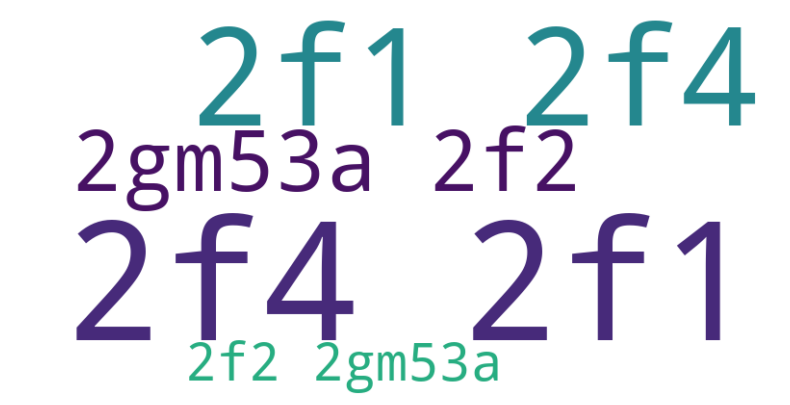

In [344]:
obj1.plot_word_cloud("CDU-I")

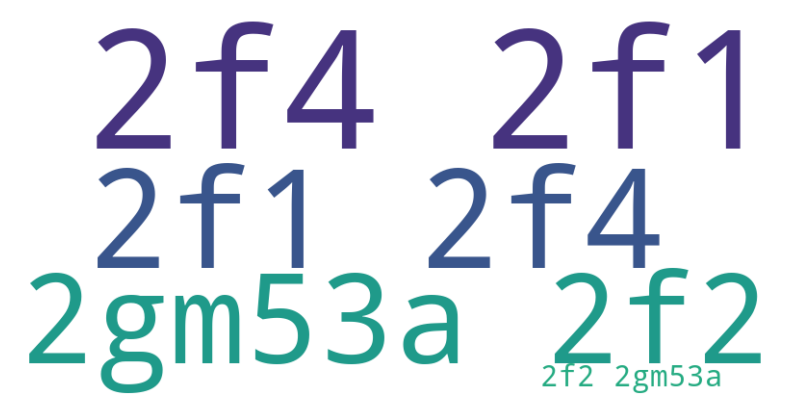

In [345]:
obj1.sequential_call("CDU-I","2f2")